In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateparser
import seaborn as sns

In [2]:
df = pd.read_csv("typeracer_data.csv",usecols=range(1,7))

In [3]:
df.columns = ['Race','Speed', 'Accuracy','Points', 'Place', 'Date']

In [4]:
df['wpm'] = [int(x.split()[0]) for x in df['Speed']]

In [37]:
df['acc'] = [float(x[:-1]) for x in df['Accuracy']]

In [5]:
df.head()

,Race,Speed,Accuracy,Points,Place,Date,wpm
0,853,58 WPM,94.2%,27.0,4/5,"March 11, 2020",58
1,852,87 WPM,98.9%,41.0,3/5,"March 11, 2020",87
2,851,74 WPM,95.3%,30.0,1/5,"March 11, 2020",74
3,850,74 WPM,95.7%,63.0,4/5,"March 11, 2020",74
4,849,72 WPM,95.8%,65.0,2/4,"March 11, 2020",72


In [7]:
df['datetime'] = [dateparser.parse(x) for x in df['Date']]

Text(0, 0.5, 'wpm')

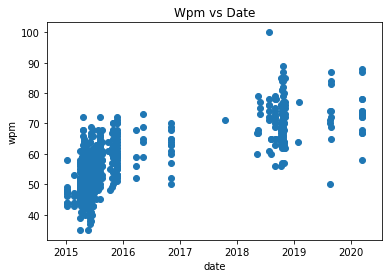

In [33]:
plt.scatter(df['datetime'],df['wpm'])
plt.title("Wpm vs Date")
plt.xlabel("date")
plt.ylabel("wpm")

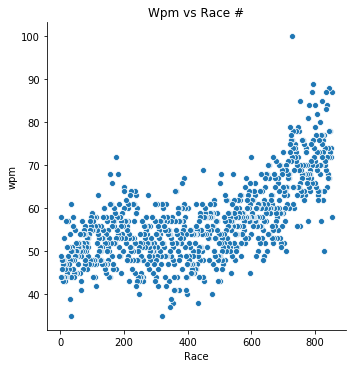

In [30]:
sns.relplot(x='Race',y='wpm',sizes=(15, 200),data=df)
plt.title("Wpm vs Race #")
plt.show()

In [29]:
def to_integer(dt_time):
    return (dt_time.year*31*12 + dt_time.month*31 + dt_time.day) - 2015*(31*12) - 1*31 - 12
print("First date:",list(df['datetime'])[-1])
df['date_int'] = [to_integer(datetime) for datetime in df['datetime']]

First date: 2015-01-12 00:00:00


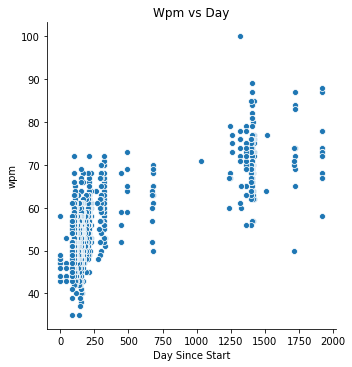

In [47]:
sns.relplot(x='date_int',y='wpm',kind='scatter',data=df)
plt.xlabel("Day Since Start")
plt.title("Wpm vs Day")
plt.show()

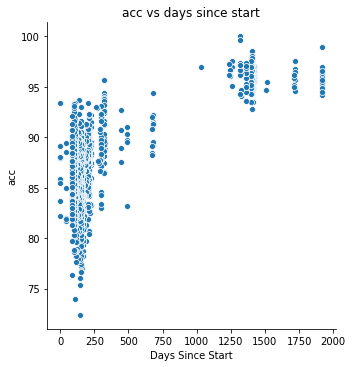

In [54]:
sns.relplot(x='date_int',y='acc',kind='scatter',data=df)
plt.title("acc vs days since start")
plt.xlabel("Days Since Start")
plt.show()

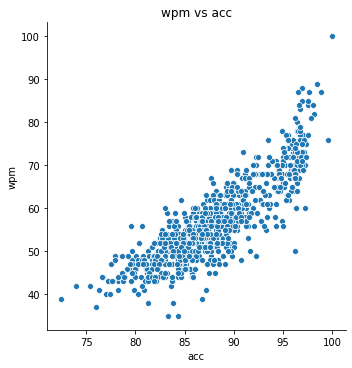

In [51]:
sns.relplot(x='acc',y='wpm',kind='scatter',data=df)
plt.title("wpm vs acc")
plt.show()